In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from skimage import io
from os.path import expanduser
from tqdm import tqdm
HOME = expanduser("~")
import os
import cv2
import math
import pandas as pd
from skimage.transform import resize
from skimage.exposure import rescale_intensity, adjust_gamma
from scipy.ndimage.interpolation import map_coordinates
from skimage.util import img_as_ubyte
from skimage.exposure import equalize_hist
#%matplotlib inline

In [2]:
#DIR = os.path.join(HOME, 'programming', 'dk39')
DIR = '/net/birdstore/Active_Atlas_Data/data_root/pipeline_data/DK39'
ALIGNED = os.path.join(DIR, 'preps', 'aligned')
NORMALIZED = os.path.join(DIR, 'preps', 'normalized')
MASKED = os.path.join(DIR, 'preps', 'masked')
INPUT = A
OUTPUT = NORMALIZED
files = sorted(os.listdir(INPUT))
#masks = sorted(os.listdir(MASKED))

In [ ]:
def rescale_intensity_v2(im, low, high):
    """
    Linearly map `low` to 0 and `high` to 255.
    Args:
        im (2d array of float): input image.
    """

    if low > high:
        im_out = rescale_intensity(low-im.astype(np.float), (0, low-high), (0, 60000)).astype(np.uint16)
    else:
        im_out = rescale_intensity(im.astype(np.float), (low, high), (0, )).astype(np.uint16)
    return im_out


In [ ]:
print(len(files), len(masks))

In [9]:
# get oriented for comparison
img_inputs = []
masks = []
img_outputs = []
file_inputs = []
section_number = 0
midpoint = len(files) // 2
low = 0
high = 40000
gamma_map = img_as_ubyte(adjust_gamma(np.arange(0, 60001, 1) / 60000, 16.))
tilesize = 16
for i, file in enumerate(tqdm(files)):
    infile = os.path.join(INPUT, file)
    img = cv2.imread(infile, -1)
    img_inputs.append(img)
    clahe = cv2.createCLAHE(clipLimit=40.0, tileGridSize=(tilesize, tilesize))
    img = clahe.apply(img)    
    file_inputs.append(file)
    img_outputs.append(img)
    del img

100%|██████████| 469/469 [00:19<00:00, 23.76it/s]


In [ ]:
print(len(img_outputs), len(file_inputs) )

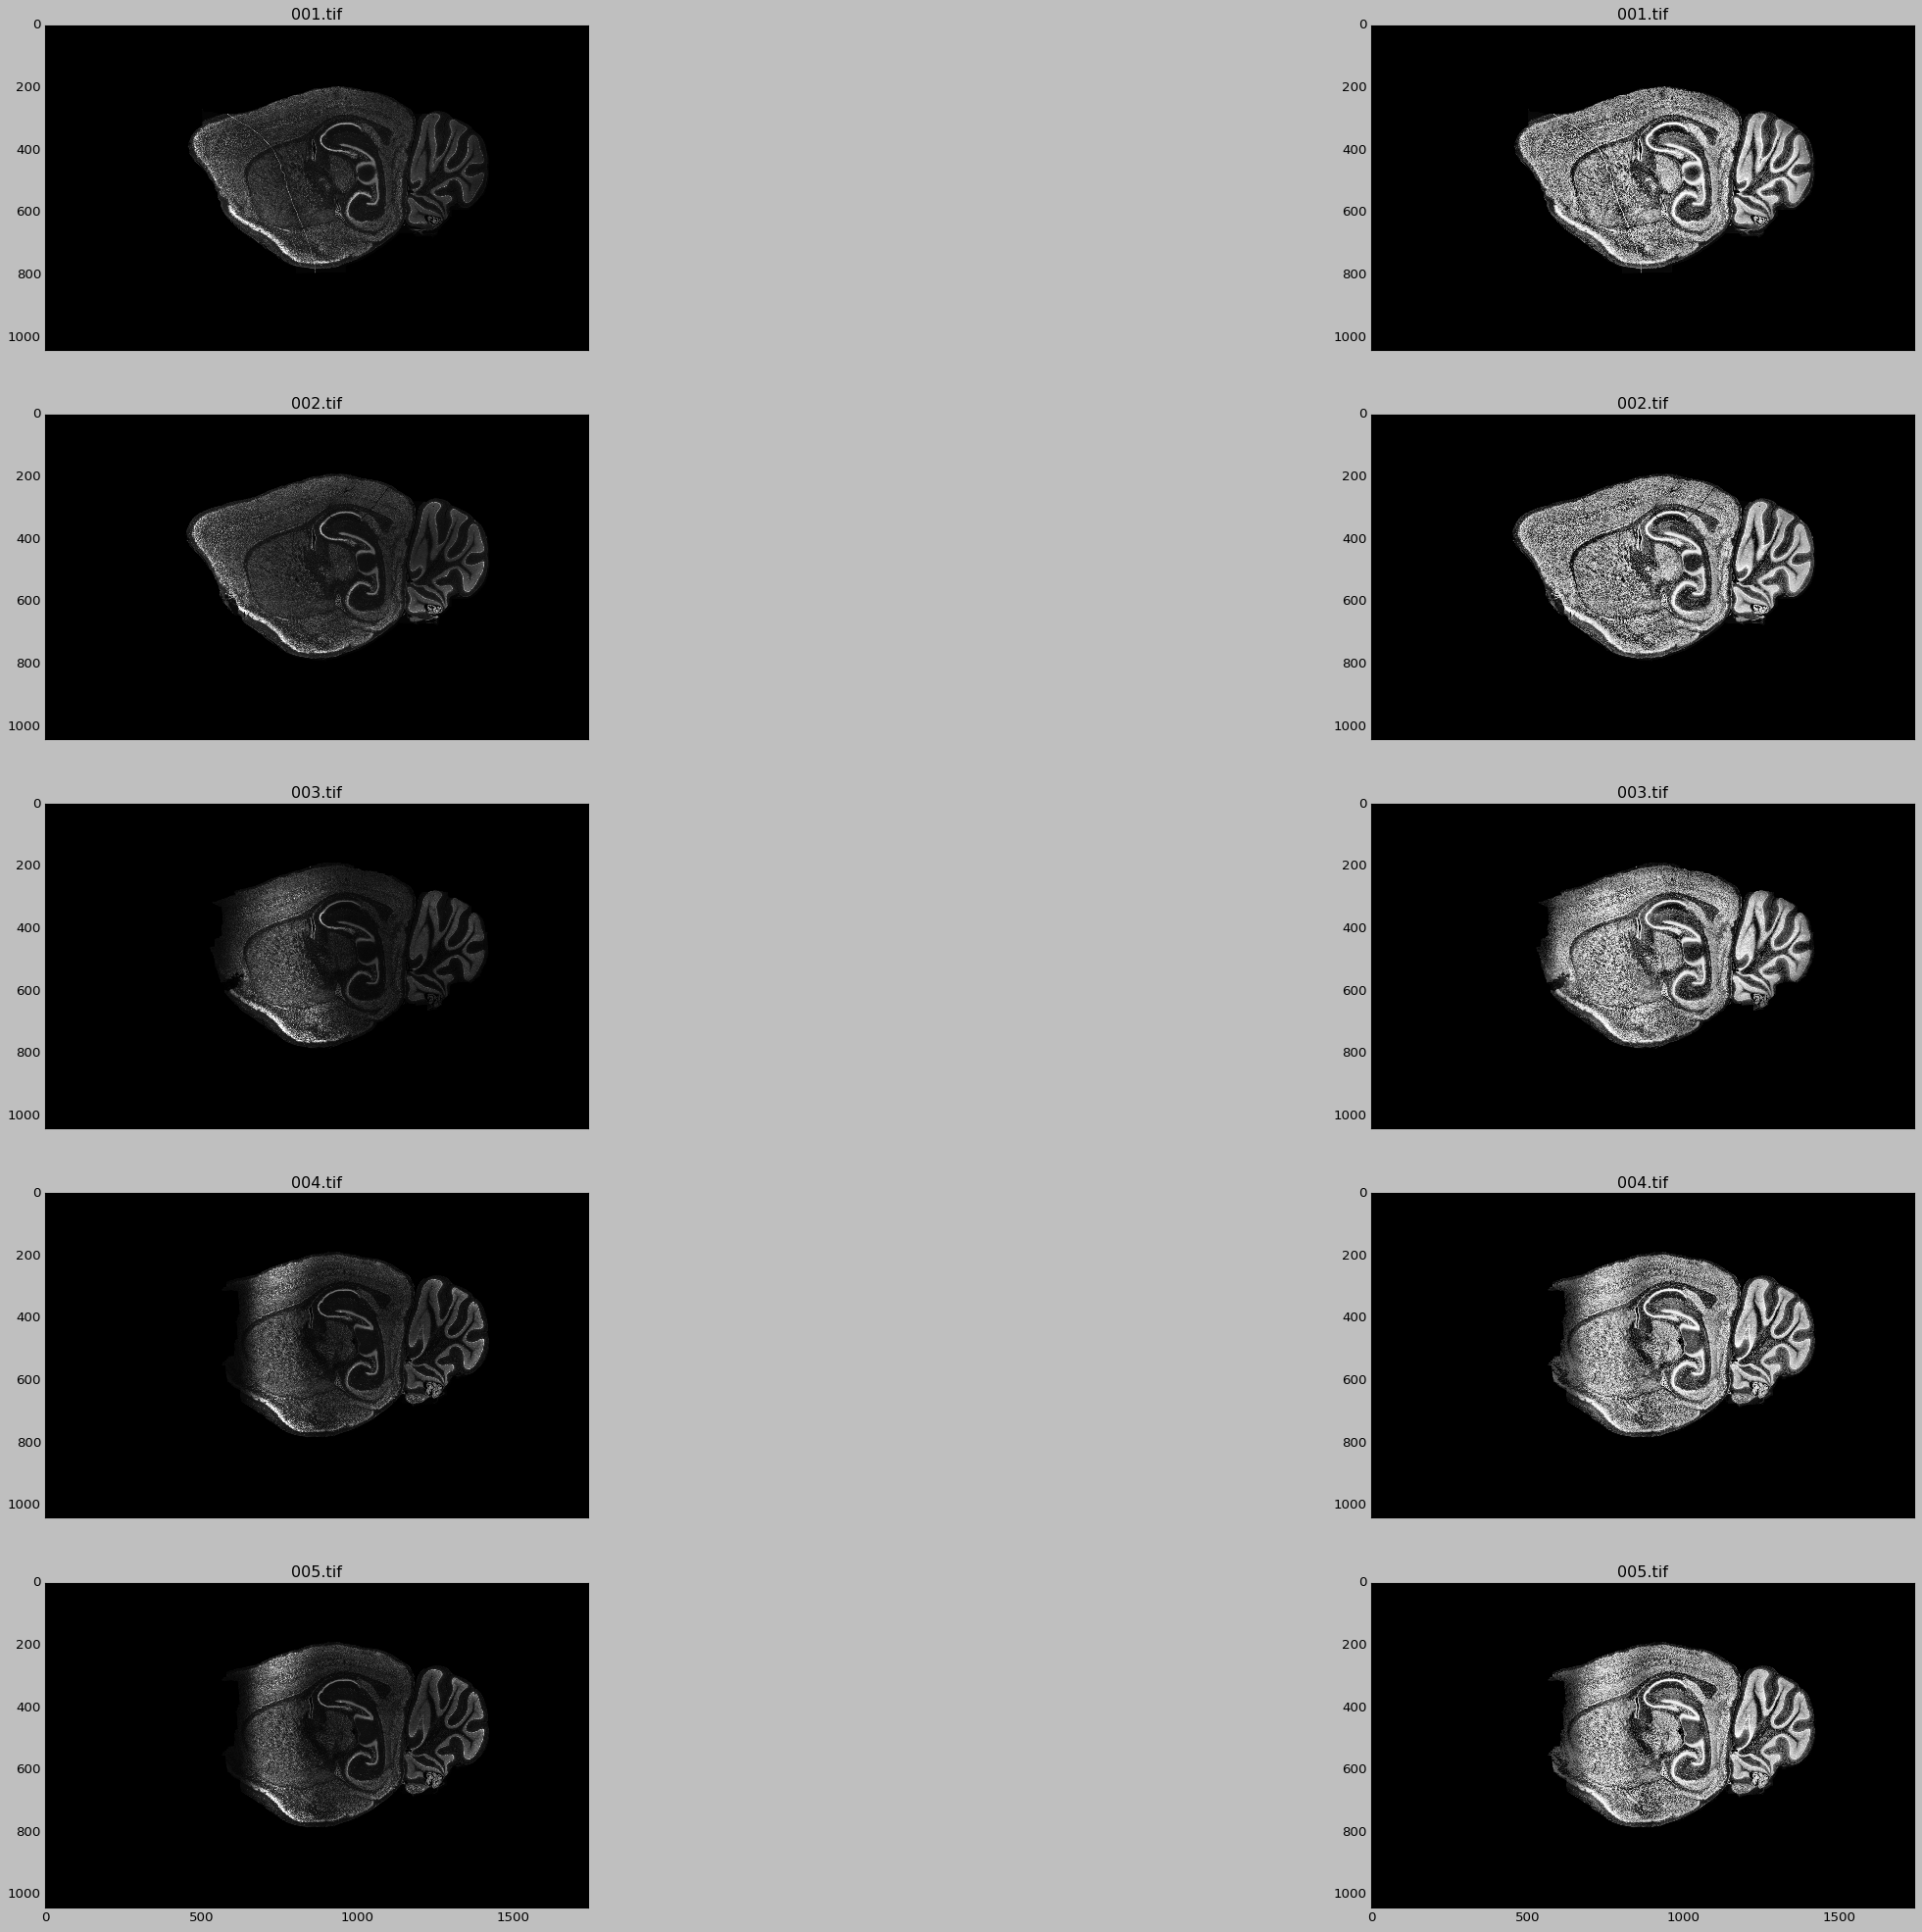

In [11]:
start, finish = (110,115)
tfiles = file_inputs[start:finish]
ins = img_inputs[start:finish]
outs = img_outputs[start:finish]
fig, ax = plt.subplots(nrows=len(tfiles), ncols=2, sharex=True)
plt.style.use('classic')
#plt.rcParams.update({'figure.figsize': [5,16]})
i = 0
for old, new, filename in zip(ins, outs, files):
    ax[i,0].set_title(filename)
    ax[i,0].imshow(old, cmap='gray')

    ax[i,1].set_title(filename)
    ax[i,1].imshow(new, cmap='gray')
    i += 1
fig.set_size_inches(np.array(fig.get_size_inches()) * len(tfiles))
plt.show()

In [ ]:
start, finish = (110,112)
files = file_inputs[start:finish]
ins = img_inputs[start:finish]
outs = img_outputs[start:finish]

w = 10
h = 10
fig = plt.figure(figsize=(9, 13))
columns = 2
rows = len(files)

# prep (x,y) for extra plotting
xs = np.linspace(0, 2*np.pi, 60)  # from 0 to 2pi
ys = np.abs(np.sin(xs))           # absolute of sine

# ax enables access to manipulate each of subplots
ax = []

for i in range(columns*rows):
    img = np.random.randint(10, size=(h,w))
    # create subplot and append to ax
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title("ax:"+str(i))  # set title
    plt.imshow(img, alpha=0.25)

# do extra plots on selected axes/subplots
# note: index starts with 0
ax[2].plot(xs, 3*ys)
ax[19].plot(ys**2, xs)

plt.show()  # finally, render the plot